DNN MNISt Play book
Reference:


Plan of action:  
Read the data  
Preprocessing - normalize the data using divide by maximum  
Neural Architecture design  
- Sequential model  
- input layer - Flattenned - 784 neurons
- hidden layer -128 neurons, ReLU  
- output layer - 10 neurons with softmax  
Compile  
- Optimizer - adam  
- loss function - CCE  
- metric - accuracy  
Fit  
- 20% validation  
- 5 epochs  
Testing  
Visualizations  
Extensions  
- Make the NN deeper with 4 to 5 layers  
- Add dropout layer  
- Add regularization layer  
- Add Confusion matrix


Prompt: Load mnist data

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


Prompt:
Visualize first 10 digits in the training set side by side

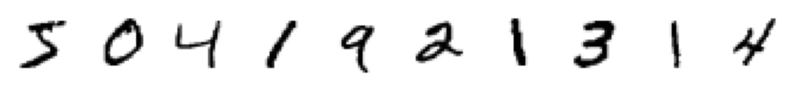

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first 10 digits
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.axis('off')
plt.show()

Prompt:
Normalize the training and testing features using division by 255

In [ ]:
# Normalize the training and testing data
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

print(f"Normalized training data shape: {x_train_normalized.shape}")
print(f"Normalized testing data shape: {x_test_normalized.shape}")

Normalized training data shape: (60000, 28, 28)
Normalized testing data shape: (10000, 28, 28)


Prompt:
Create a keras sequential model

In [ ]:
#Neural architecture design

In [ ]:
# Create a Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Input layer
    tf.keras.layers.Dense(128, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # Output layer
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Prompt: Compile the model with adam optimizer, cross category entropy as loss function and accuracy as the metric

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Prompt:
Show the model summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Prompt:Train the model with 20% validation and 5 epochs

In [ ]:
# Fit the model
history = model.fit(x_train_normalized, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8614 - loss: 0.4902 - val_accuracy: 0.9550 - val_loss: 0.1534
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9617 - loss: 0.1380 - val_accuracy: 0.9651 - val_loss: 0.1168
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9740 - loss: 0.0870 - val_accuracy: 0.9696 - val_loss: 0.1030
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9801 - loss: 0.0646 - val_accuracy: 0.9734 - val_loss: 0.0866
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9855 - loss: 0.0478 - val_accuracy: 0.9737 - val_loss: 0.0883


Prompt: Test the model on test set

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test_normalized, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9746 - loss: 0.0805

Test accuracy: 0.9746000170707703


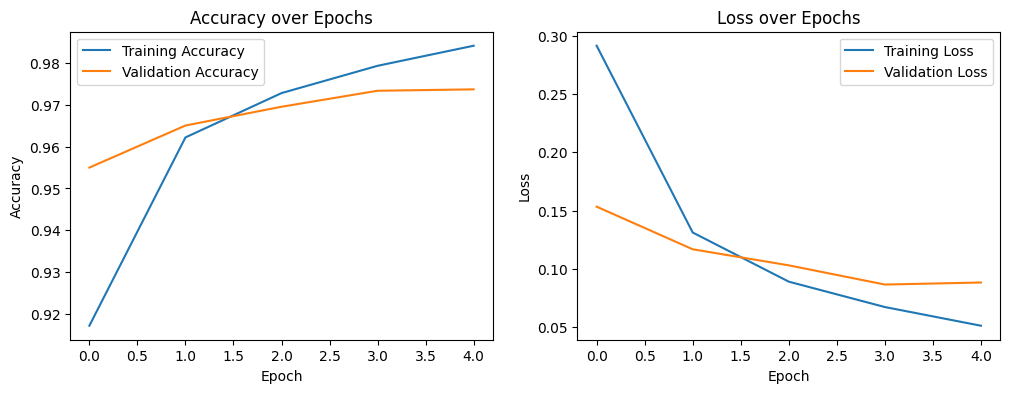

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Extension

Extension 1:  
Add confusion matrix and classification report.

Prompt: Add confusion matrix and classification report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict the labels for the test set
y_pred = model.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred_classes)
print("\nClassification Report:")
print(class_report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[ 965    1    3    2    1    2    3    1    1    1]
 [   0 1124    2    2    0    1    2    0    4    0]
 [   3    2 1002    4    1    0    3    4   11    2]
 [   1    0    3  993    0    5    0    3    4    1]
 [   0    0    5    1  949    1    6    1    2   17]
 [   2    2    0   10    2  863    6    2    5    0]
 [   4    4    2    1    4    5  935    0    3    0]
 [   0    8    9    7    0    0    0  995    1    8]
 [   4    0    6    9    3    5    1    2  939    5]
 [   3    3    0    5   11    2    0    4    0  981]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
       

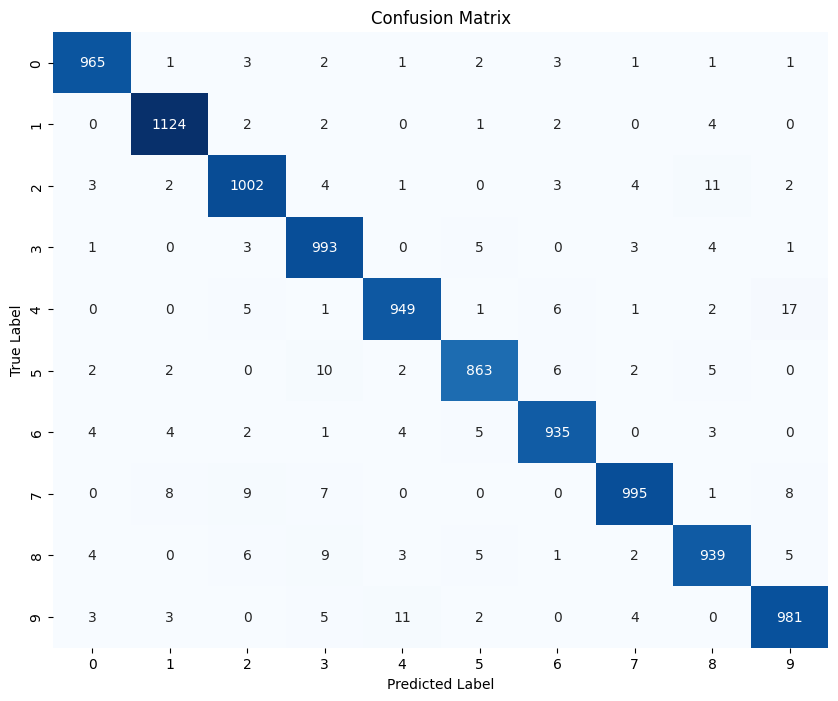

In [ ]:
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Extension 2:  
Increase the number of neurons to 256

Prompt: Define a deep neural network with 1 input layer, 1 hidden layers with 258 neurons having ReLU and one output layer

In [ ]:
# Define a new deep neural network with increased neurons in the hidden layer
model_256 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Input layer
    tf.keras.layers.Dense(256, activation='relu'), # Hidden layer with 256 neurons
    tf.keras.layers.Dense(10, activation='softmax') # Output layer
])

model_256.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

Prompt: Compile and summarize the model

In [ ]:
# Compile the new model
model_256.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Show the new model summary
model_256.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

Prompt: Train the model with 20% validation

In [ ]:
# Fit the new model
history_256 = model_256.fit(x_train_normalized, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8782 - loss: 0.4245 - val_accuracy: 0.9594 - val_loss: 0.1389
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9667 - loss: 0.1105 - val_accuracy: 0.9668 - val_loss: 0.1087
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9795 - loss: 0.0662 - val_accuracy: 0.9683 - val_loss: 0.1047
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9845 - loss: 0.0496 - val_accuracy: 0.9755 - val_loss: 0.0867
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9901 - loss: 0.0331 - val_accuracy: 0.9756 - val_loss: 0.0816


Inference: Model accuracy on training is improved to impressive 99.01%. However validation accuracy has not improved. This indicated model is overfitted.

Prompt:
Test the model on test set

In [ ]:
# Evaluate the new model on the test data
test_loss_256, test_acc_256 = model_256.evaluate(x_test_normalized, y_test, verbose=2)

print('\nTest accuracy (256 neurons):', test_acc_256)

313/313 - 1s - 2ms/step - accuracy: 0.9775 - loss: 0.0744

Test accuracy (256 neurons): 0.9775000214576721


Inference: Test accuracy confirms overfitting. Therefore, increasing the number of neurons is no guarantee for improvement of accuracy.


Extension 3: Increase number of layers, keeping number of neurons to 128


Prompt:Build a dnn model with 3 hiodden layers having 128 neurons and relu activation

In [ ]:
# Define a new deep neural network with three hidden layers
model_deep = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Input layer
    tf.keras.layers.Dense(128, activation='relu'), # First hidden layer
    tf.keras.layers.Dense(128, activation='relu'), # Second hidden layer
    tf.keras.layers.Dense(128, activation='relu'), # Third hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # Output layer
])

model_deep.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Prompt: Compile and show the summary of the mode

In [ ]:
# Compile the deep model
model_deep.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Show the deep model summary
model_deep.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Prompt: fit the model with 20% validation

In [ ]:
# Fit the deep model
history_deep = model_deep.fit(x_train_normalized, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8650 - loss: 0.4454 - val_accuracy: 0.9561 - val_loss: 0.1493
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9643 - loss: 0.1173 - val_accuracy: 0.9685 - val_loss: 0.1106
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9755 - loss: 0.0755 - val_accuracy: 0.9718 - val_loss: 0.0966
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9822 - loss: 0.0574 - val_accuracy: 0.9687 - val_loss: 0.1096
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9846 - loss: 0.0467 - val_accuracy: 0.9732 - val_loss: 0.0974


Inference: The 3 layer model is not giving better results than a single layer model.

Prompt: define a dnn model for 5 hidden layers with relu activation and 128 neurons

In [ ]:
# Define a new deep neural network with five hidden layers
model_very_deep = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Input layer
    tf.keras.layers.Dense(128, activation='relu'), # First hidden layer
    tf.keras.layers.Dense(128, activation='relu'), # Second hidden layer
    tf.keras.layers.Dense(128, activation='relu'), # Third hidden layer
    tf.keras.layers.Dense(128, activation='relu'), # Fourth hidden layer
    tf.keras.layers.Dense(128, activation='relu'), # Fifth hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # Output layer
])

model_very_deep.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,818 (655.54 KB)

 Non-trainable params: 0 (0.00 B)

Prompt: Compile the model and show the summary

In [ ]:
# Compile the very deep model
model_very_deep.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Show the very deep model summary
model_very_deep.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,818 (655.54 KB)

 Non-trainable params: 0 (0.00 B)

Prompt: Fit the model with 20% validation

In [ ]:
# Fit the very deep model
history_very_deep = model_very_deep.fit(x_train_normalized, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8465 - loss: 0.4919 - val_accuracy: 0.9594 - val_loss: 0.1385
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9621 - loss: 0.1264 - val_accuracy: 0.9642 - val_loss: 0.1242
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9729 - loss: 0.0909 - val_accuracy: 0.9670 - val_loss: 0.1184
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9784 - loss: 0.0707 - val_accuracy: 0.9720 - val_loss: 0.1001
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9832 - loss: 0.0587 - val_accuracy: 0.9722 - val_loss: 0.0971


Inference: The 5 layer model is overfiting the data